In [5]:
#IMPORTING LIBRARIES

import numpy as np
import pandas as pd
import nibabel
import cv2


In [7]:
df_1 = pd.read_csv(r'test_run\filepath_and_data.csv')
df_1.sample(3)

,Filename,Recognizable-Facial-Feature
471,IXI282-HH-2025-T1_bet_72.nii,0
262,IXI561-IOP-1152-T1_bet_13.nii,1
391,IXI489-Guys-1014-T1_bet_79.nii,0


In [8]:
from tqdm import tqdm
def image_loader(file_path,df):
    arr , label = [] , []
    for i,j in tqdm(zip(df['Filename'].values,df['Recognizable-Facial-Feature'])):
        # print(i,j)
        img = nibabel.load(file_path + i)
        img = img.get_fdata()
        img = cv2.resize(img[:,:,90],(200,200))
        arr.append(img)
        label.append(j)
    return np.array(arr) , np.array(label)


For missing data i.e.,  the pixel values for some images are not proper as mentioned in the report. 
It can be handled by using cv2.resize(Standardizing all the images).In the model building part.

In [9]:
X , y = image_loader("C:/Freelance/mri_data/BSE_BET_DATA/New_data/",df_1)

2060it [02:36, 13.20it/s]


In [10]:
X.shape

(2060, 200, 200)

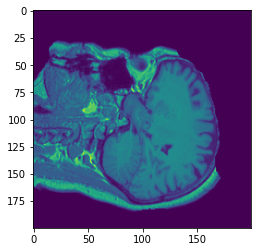

In [11]:
import matplotlib.pyplot as plt
plt.imshow(X[50])

In [12]:
y[50]

1

In [13]:
y[1000]

0

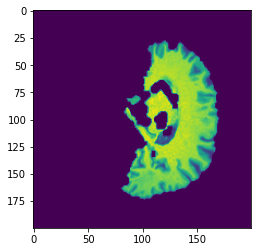

In [14]:
plt.imshow(X[1000])

In [15]:
from tensorflow import keras 
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Dense , Conv2D , Flatten, Dropout, MaxPool2D

In [16]:
model = Sequential()
model.add(Conv2D(64,(3,3),padding="same",input_shape = (200,200,1),activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Conv2D(128,(3,3),padding="same",activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Conv2D(256,(3,3),padding="same",activation="relu"))
model.add(Conv2D(256,(3,3),padding="same",activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Conv2D(512,(3,3),padding="same",activation="relu"))
model.add(Conv2D(512,(3,3),padding="same",activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Conv2D(512,(3,3),padding="same",activation="relu"))
model.add(Conv2D(512,(3,3),padding="same",activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Conv2D(512,(3,3),padding="same",activation="relu"))
model.add(Conv2D(512,(3,3),padding="same",activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dense(54,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 64)      640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 256)       295168    
                                                                 
 conv2d_3 (Conv2D)           (None, 50, 50, 256)       5

In [20]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [21]:
X = X.reshape(2060,200,200,1)

In [ ]:
model.fit(X,y , batch_size=150,epochs=20,validation_split=0.1)